In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [7]:
df=pd.read_csv('C:\\Users\\Admin\\Desktop\\DjangoAPI\\bankloan.csv')
df=df.drop('Loan_ID',axis=1)
df=df.dropna()
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [9]:
pre_Y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_Y=pre_Y.map(dict(Y=1,N=0))
dm_X=pd.get_dummies(pre_X)

In [10]:
X_min=dm_X.min(axis=0)
X_max=dm_X.max(axis=0)
print(X_min)
print(X_max)

Dependents                   0.0
ApplicantIncome              150
CoapplicantIncome            0.0
LoanAmount                  9000
Loan_Amount_Term            36.0
Credit_History               0.0
Gender_Female              False
Gender_Male                False
Married_No                 False
Married_Yes                False
Education_Graduate         False
Education_Not Graduate     False
Self_Employed_No           False
Self_Employed_Yes          False
Property_Area_Rural        False
Property_Area_Semiurban    False
Property_Area_Urban        False
dtype: object
Dependents                     3.0
ApplicantIncome              81000
CoapplicantIncome          33837.0
LoanAmount                  600000
Loan_Amount_Term             480.0
Credit_History                 1.0
Gender_Female                 True
Gender_Male                   True
Married_No                    True
Married_Yes                   True
Education_Graduate            True
Education_Not Graduate        True
Self_

In [12]:
smote=SMOTE(random_state=42)
X,Y = smote.fit_resample(dm_X,dm_Y)
sc=MinMaxScaler()
X=sc.fit_transform(X)
Counter(Y)

Counter({0: 332, 1: 332})

In [13]:
xtrn,xtst,ytrn,ytst=train_test_split(X,Y,test_size=0.2, random_state=42, shuffle=True)

In [14]:
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=xtst.shape[1]))
model.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(xtrn,ytrn, batch_size=20, epochs=50, verbose=0)

In [15]:
eval_model_on_train=model.evaluate(xtrn,ytrn)
print(eval_model_on_train)
eval_model_on_test=model.evaluate(xtst,ytst)
print(eval_model_on_test)

17/17 [==============================] - 0s 6ms/step - loss: 0.2717 - accuracy: 0.9040
[0.2717036306858063, 0.903954803943634]
5/5 [==============================] - 0s 8ms/step - loss: 0.4842 - accuracy: 0.8045
[0.48421651124954224, 0.8045112490653992]


5/5 [==============================] - 0s 6ms/step


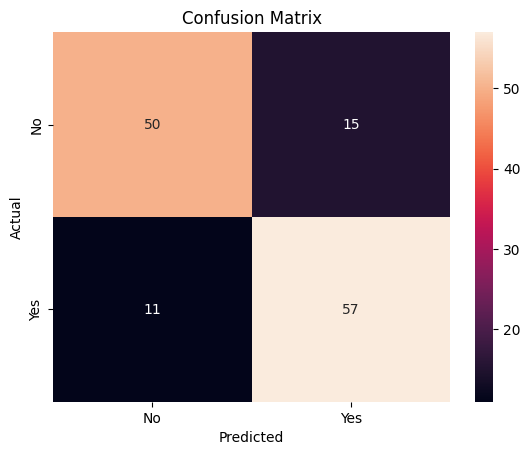

In [16]:
ypred=model.predict(xtst)
ypred=(ypred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytst,ypred)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);

ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']);
ax.yaxis.set_ticklabels(['No','Yes']);

In [17]:
import pickle
import joblib
joblib.dump(model,'loan_model.pkl')

['loan_model.pkl']